In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from test_case_utils import MlflowConfig, TestCase, TargetCases, get_metrics_df, get_result_df

In [4]:
###
# reuse predict evaluation
###
reuse_pred_metrics_df = pd.DataFrame()
reuse_pred_results_df = pd.DataFrame()
for name, run_id in MlflowConfig.eval_run_ids.items():
    _metrics_df = get_metrics_df(run_id)
    _results_df = get_result_df(run_id)
    _metrics_df = pd.merge(_metrics_df, _results_df[['test_case_name', 'predict_utc_time', 'time_step']], how='left', left_on=['test_case_name', 'predict_utc_time'], right_on=['test_case_name', 'predict_utc_time'])
    
    if name == 'rain_only':
        hue = 'Rainfall only'
    else:
        hue = 'Rainfall + Temperature + Humidity'
    _metrics_df['hue'] = hue
    _results_df['hue'] = hue
    reuse_pred_metrics_df = pd.concat([reuse_pred_metrics_df, _metrics_df], axis=0)
    reuse_pred_results_df = pd.concat([reuse_pred_results_df, _results_df], axis=0)

reuse_pred_metrics_df.head()

,Unnamed: 0,LON,LAT,hour-rain,AT1,RH1,SOL,WD1,WS1,PRS,...,V-WIND,Pred_Value,test_case_name,date,predict_utc_time,target_parameter,time_step_x,case_type,time_step_y,hue
0,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,0,Rainfall only
1,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,0,Rainfall only
2,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,0,Rainfall only
3,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,0,Rainfall only
4,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,0,Rainfall only


In [5]:
reuse_pred_results_df.head()

,Unnamed: 0,LON,LAT,hour-rain,AT1,RH1,SOL,WD1,WS1,PRS,...,U-WIND,V-WIND,Pred_Value,test_case_name,date,predict_utc_time,target_parameter,time_step,case_type,hue
0,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.20074,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,Rainfall only
1,NagNayon_00181273,121.0285,14.7192,0.0,32.5,52.1,441.0,332.0,0.4,1002.3,...,-0.35318,0.18779,0.443509,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,Rainfall only
2,DLSAU_00174722,120.9974,14.6705,0.0,31.9,51.8,526.0,18.0,0.2,1005.5,...,-0.19021,-0.06180,0.398478,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,Rainfall only
3,ASTI_00173457,121.0721,14.6471,0.0,31.8,49.2,146.0,131.0,0.3,1000.1,...,0.19682,-0.22641,0.399337,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,Rainfall only
4,MM-SanAndres_00173459,121.0061,14.5837,0.0,32.0,50.3,653.0,211.0,0.7,1006.2,...,0.60002,0.36053,0.517201,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,Rainfall only


In [7]:
###
# update inputs evaluation
###
update_inputs_metrics_df = pd.DataFrame()
update_inputs_results_df = pd.DataFrame()
for name, run_id in MlflowConfig.eval_run_ids.items():
    _metrics_df = get_metrics_df(run_id, 'update_inputs')
    _results_df = get_result_df(run_id, 'update_inputs')
    _metrics_df = pd.merge(_metrics_df, _results_df[['test_case_name', 'predict_utc_time', 'time_step']], how='left', left_on=['test_case_name', 'predict_utc_time'], right_on=['test_case_name', 'predict_utc_time'])
    
    if name == 'rain_only':
        hue = 'Rainfall only'
    else:
        hue = 'Rainfall + Temperature + Humidity'
    _metrics_df['hue'] = hue
    _results_df['hue'] = hue
    update_inputs_metrics_df = pd.concat([update_inputs_metrics_df, _metrics_df], axis=0)
    update_inputs_results_df = pd.concat([update_inputs_results_df, _results_df], axis=0)

update_inputs_metrics_df.head()

,Unnamed: 0,LON,LAT,hour-rain,AT1,RH1,SOL,WD1,WS1,PRS,...,V-WIND,Pred_Value,test_case_name,date,predict_utc_time,target_parameter,time_step_x,case_type,time_step_y,hue
0,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,0,Rainfall only
1,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,0,Rainfall only
2,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,0,Rainfall only
3,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,0,Rainfall only
4,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,0,Rainfall only


In [8]:
update_inputs_results_df.head()

,Unnamed: 0,LON,LAT,hour-rain,AT1,RH1,SOL,WD1,WS1,PRS,...,U-WIND,V-WIND,Pred_Value,test_case_name,date,predict_utc_time,target_parameter,time_step,case_type,hue
0,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,...,0.20074,0.22294,0.409625,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,Rainfall only
1,NagNayon_00181273,121.0285,14.7192,0.0,32.5,52.1,441.0,332.0,0.4,1002.3,...,-0.35318,0.18779,0.443509,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,Rainfall only
2,DLSAU_00174722,120.9974,14.6705,0.0,31.9,51.8,526.0,18.0,0.2,1005.5,...,-0.19021,-0.06180,0.398478,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,Rainfall only
3,ASTI_00173457,121.0721,14.6471,0.0,31.8,49.2,146.0,131.0,0.3,1000.1,...,0.19682,-0.22641,0.399337,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,Rainfall only
4,MM-SanAndres_00173459,121.0061,14.5837,0.0,32.0,50.3,653.0,211.0,0.7,1006.2,...,0.60002,0.36053,0.517201,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,rain,0,tc,Rainfall only


Text(0.5, 1.0, 'Scatter plot of 1h predictions and observations.')

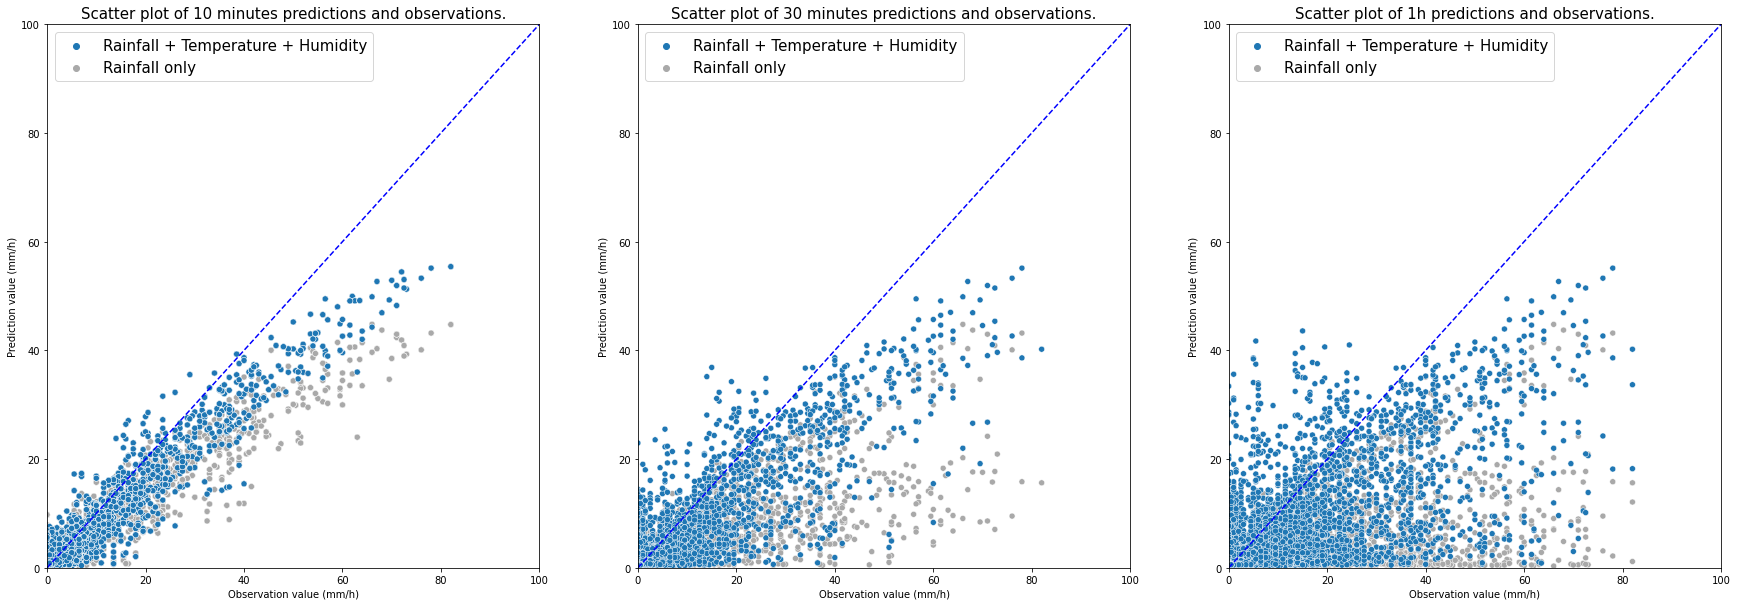

In [10]:
###
# Scatter plot of RMSE
###
fig, axis = plt.subplots(1, 3, figsize=(30, 10))
palette = {'Rainfall only': 'darkgray', 'Rainfall + Temperature + Humidity': 'tab:blue'}
hue = 'hue'
xcol = 'hour-rain'
ycol = 'Pred_Value'
x = np.linspace(0, 100, 10)
xlabel = 'Observation value (mm/h)'
ylabel = 'Prediction value (mm/h)'

# First 10 minutes
ax = axis[0]
sns.scatterplot(data=update_inputs_results_df, x=xcol, y=ycol, ax=ax, hue=hue, palette=palette, hue_order=['Rainfall + Temperature + Humidity', 'Rainfall only'])
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.plot(x, x, color="blue", linestyle="--")
ax.legend(prop=dict(size=15))
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('Scatter plot of 10 minutes predictions and observations.', fontsize=15)

# First 30 minutes
ax = axis[1]
data = reuse_pred_results_df.loc[reuse_pred_results_df.time_step.isin([0, 1, 2])]
sns.scatterplot(data=data, x=xcol, y=ycol, ax=ax, hue=hue, palette=palette, hue_order=['Rainfall + Temperature + Humidity', 'Rainfall only'])
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.plot(x, x, color="blue", linestyle="--")
ax.legend(prop=dict(size=15))
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('Scatter plot of 30 minutes predictions and observations.', fontsize=15)
# 1 hour
ax = axis[2]
sns.scatterplot(data=reuse_pred_results_df, x=xcol, y=ycol, ax=ax, hue=hue, palette=palette, hue_order=['Rainfall + Temperature + Humidity', 'Rainfall only'])
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.plot(x, x, color="blue", linestyle="--")
ax.legend(prop=dict(size=15))
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('Scatter plot of 1h predictions and observations.', fontsize=15)

In [ ]:
###
# box plot of RMSE time changes.
###
plt.figure(figsize=(12, 9))
ax = sns.boxplot(data=df, x="time_step", y='rmse', hue='hue', palette=palette)
ax.set_title(f"RMSE timeseries change for prediction of Rainfall.")
ax.set_xlabel("prediction time step (min)")
ax.set_ylabel("RMSE")
ax.set_xticklabels([i * 10 for i in range(1, 7)])
# plt.savefig(os.path.join(downstream_directory, f"timeseries_{target_metrics_name}_plot.png"))
plt.show()
plt.close()

: 

In [ ]:
###
# update inputs evaluation
###
metrics_df = pd.DataFrame()
results_df = pd.DataFrame()
for name, run_id in MlflowConfig.eval_run_ids.items():
    _metrics_df = get_metrics_df(run_id, 'update_inputs')
    _results_df = get_result_df(run_id, 'update_inputs')
    _metrics_df = pd.merge(_metrics_df, _results_df[['test_case_name', 'predict_utc_time', 'time_step']], how='left', left_on=['test_case_name', 'predict_utc_time'], right_on=['test_case_name', 'predict_utc_time'])
    
    if name == 'rain_only':
        hue = 'Rainfall only'
    else:
        hue = 'Rainfall + Temperature + Humidity'
    _metrics_df['hue'] = hue
    _results_df['hue'] = hue
    metrics_df = pd.concat([metrics_df, _metrics_df], axis=0)
    results_df = pd.concat([results_df, _results_df], axis=0)

metrics_df.head()

: 

In [ ]:
###
# Scatter plot of RMSE
###
fig, axis = plt.subplots(1, 1, figsize=(10, 10))
palette = {'Rainfall only': 'darkgray', 'Rainfall + Temperature + Humidity': 'tab:blue'}
hue = 'hue'
xcol = 'hour-rain'
ycol = 'Pred_Value'
x = np.linspace(0, 100, 10)
xlabel = 'Observation value (mm/h)'
ylabel = 'Prediction value (mm/h)'

# First 30 minutes
ax = axis
data = results_df.loc[results_df.time_step.isin([0, 1, 2])]
sns.scatterplot(data=data, x=xcol, y=ycol, ax=ax, hue=hue, palette=palette, hue_order=['Rainfall + Temperature + Humidity', 'Rainfall only'])
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.plot(x, x, color="blue", linestyle="--")
ax.legend(prop=dict(size=15))
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('Scatter plot of sequential predictions and observations.', fontsize=15)

: 

: 